In [32]:
import pandas as pd
import numpy as np
from scipy.stats import t, boxcox
from scipy.special import boxcox1p

from tabulate import tabulate

df = pd.read_csv("mortgage_data.txt", sep=" ")
  
print(df)

       y    x1    x2     x3      x4    x5    x6
0   6.17  78.1  3042   91.3  1738.1  45.5  33.1
1   6.06  77.0  1997   84.1  1110.4  51.8  21.9
2   6.04  75.7  3162  129.3  1738.1  24.0  46.0
3   6.04  77.4  1821   41.2   778.4  45.7  51.3
4   6.02  77.4  1542  119.1  1136.7  88.9  18.7
5   6.02  73.6  1074   32.3   582.9  39.9  26.6
6   5.99  76.3  1856   45.2   778.4  54.1  35.7
7   5.91  72.5  3024  109.7  1186.0  31.1  17.0
8   5.89  77.3   216  364.3  2582.4  11.9   7.3
9   5.87  77.4  1350  111.0   613.6  27.4  11.3
10  5.85  72.4  1544   81.0   636.1  27.3   8.1
11  5.75  67.0   631  202.7  1346.0  24.6  10.0
12  5.73  68.9   972  290.1  1626.8  20.1   9.4
13  5.66  70.7   699  223.4  1049.6  24.7  31.7
14  5.66  69.8  1377  138.4  1289.3  28.8  19.7
15  5.63  72.9   399  125.4   836.3  22.9   8.6
16  5.57  68.7   304  259.5  1315.3  18.3  18.7
17  5.28  67.8     0  428.2  2081.0   7.5   2.0


In [33]:
df.isnull().sum()

y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

In [34]:
df.describe(include='all')

,y,x1,x2,x3,x4,x5,x6
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,5.841111,73.383333,1389.444444,159.788889,1245.855556,33.027778,20.950000
std,0.223420,3.826879,974.950631,112.686295,543.326910,19.057369,13.930468
min,5.280000,67.000000,0.000000,32.300000,582.900000,7.500000,2.000000
25%,5.677500,70.025000,648.000000,85.900000,792.875000,23.175000,9.550000
50%,5.880000,73.250000,1363.500000,122.250000,1161.350000,27.350000,18.700000
75%,6.020000,77.225000,1847.250000,218.225000,1556.600000,44.100000,30.425000
max,6.170000,78.100000,3162.000000,428.200000,2582.400000,88.900000,51.300000


In [38]:
df.skew()

y    -0.848502
x1   -0.295302
x2    0.531616
x3    1.135628
x4    0.911784
x5    1.528528
x6    0.805595
dtype: float64

<AxesSubplot:ylabel='Density'>

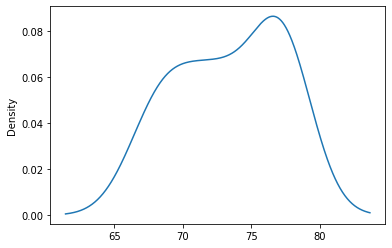

In [39]:
df['x1'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

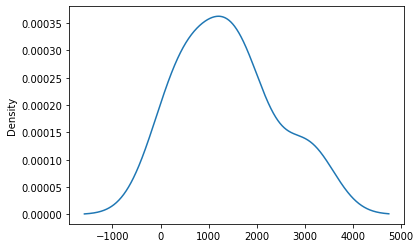

In [40]:
df['x2'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

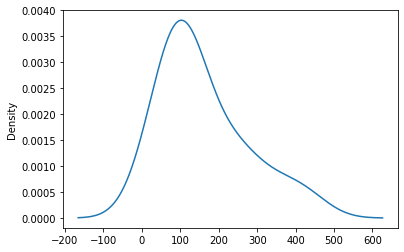

In [41]:
df['x3'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

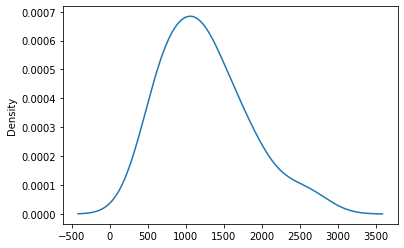

In [42]:
df['x4'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

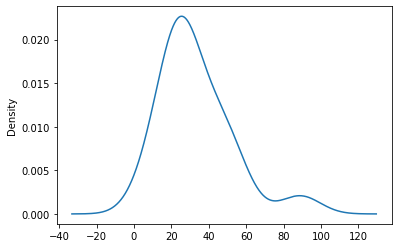

In [43]:
df['x5'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

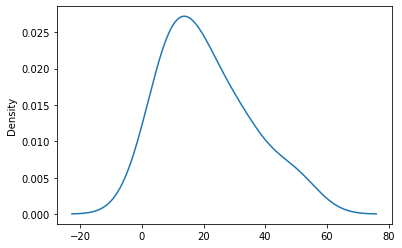

In [44]:
df['x6'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

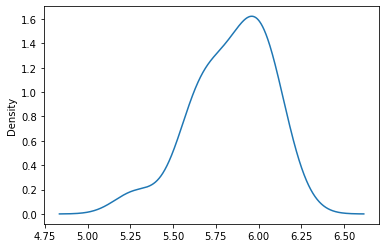

In [45]:
df['y'].plot(kind = 'kde')

NameError: name 'plt' is not defined

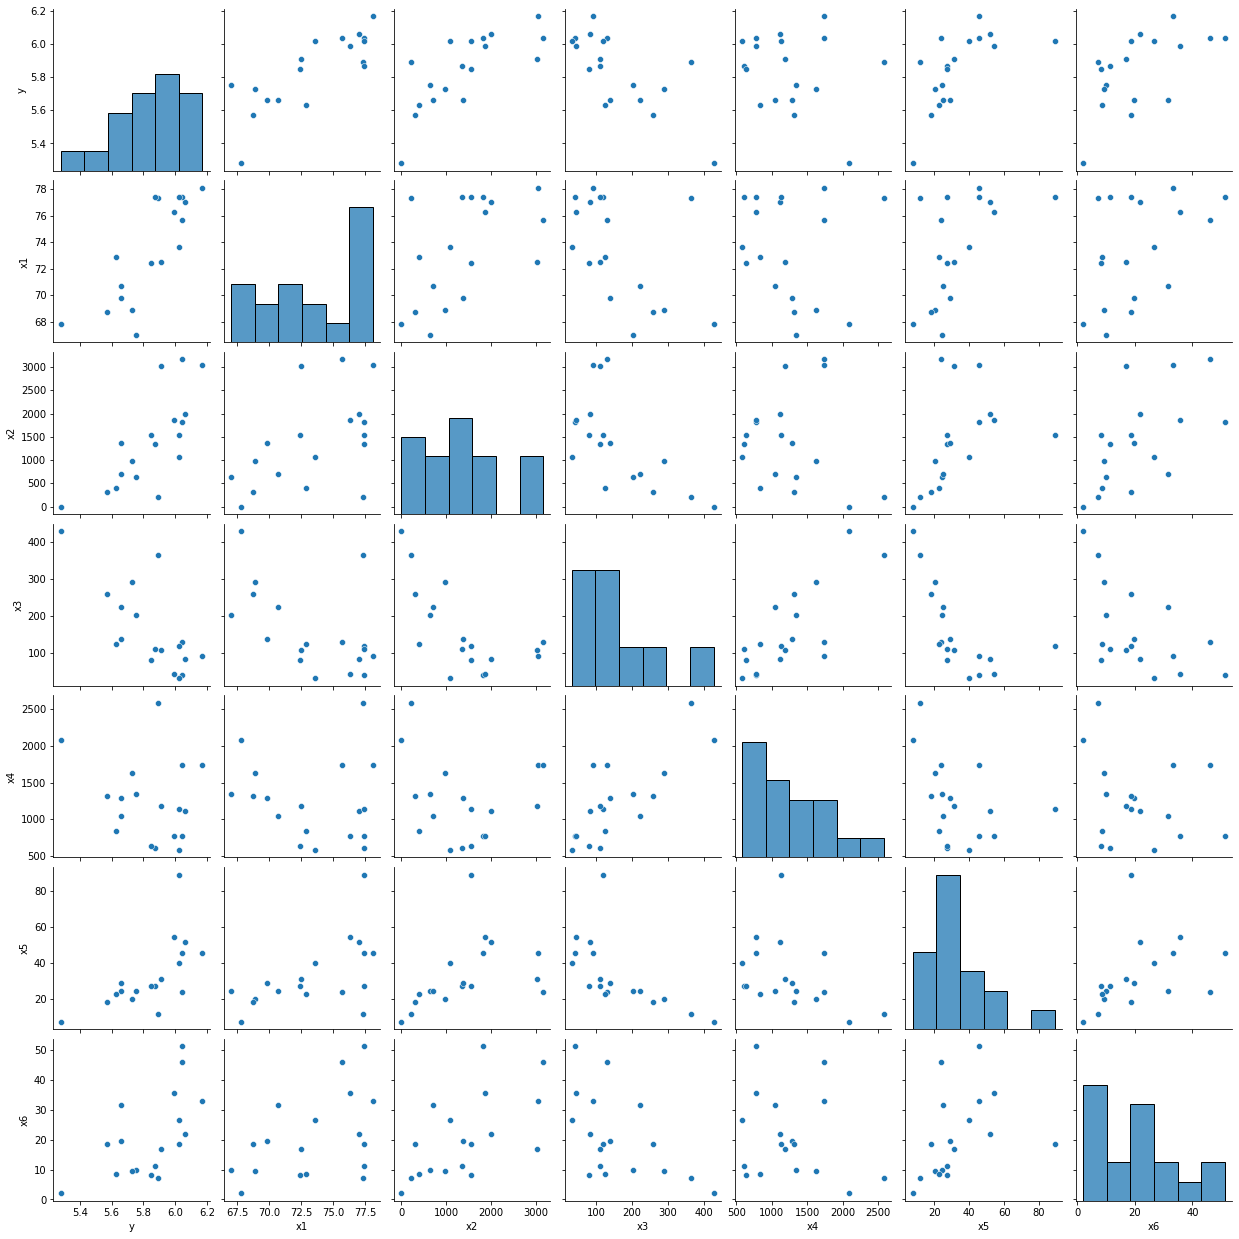

In [47]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [48]:
df.corr()

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.808485,0.738984,-0.719321,-0.221824,0.647276,0.587887
x1,0.808485,1.000000,0.525276,-0.524271,-0.120789,0.574044,0.462791
x2,0.738984,0.525276,1.000000,-0.639113,-0.143173,0.436034,0.595930
x3,-0.719321,-0.524271,-0.639113,1.000000,0.769012,-0.630635,-0.556350
x4,-0.221824,-0.120789,-0.143173,0.769012,1.000000,-0.402560,-0.225812
x5,0.647276,0.574044,0.436034,-0.630635,-0.402560,1.000000,0.393298
x6,0.587887,0.462791,0.595930,-0.556350,-0.225812,0.393298,1.000000


In [12]:
y = df['y'].to_numpy()
X = df.drop('y', axis=1)
X = X.to_numpy()

In [13]:
col = np.ones((n, 1))
X = np.insert(X, [0], col, axis = 1)
y = np.reshape(y, (n, 1))

In [40]:
def output(IV, dv, clmn):
    X = np.copy(IV)
    y = np.copy(dv)
    X = X[:, clmn]
    
    n = len(X)
    k = len(X[0]) - 1
    
    b = np.linalg.inv(np.dot(np.transpose(X), X))
    b = np.dot(b, np.transpose(X))
    b = np.dot(b, y)
    
    SSE = np.dot(np.transpose(y), y) - np.dot(np.dot(np.transpose(y), X), b)
    SSE = SSE[0][0]
    
    y_bar = np.mean(y, axis = 0)
    y_bar = y_bar[0]
    
    SSyy = np.dot(np.transpose(y), y)[0][0] - n * y_bar * y_bar
    
    SSR = SSyy - SSE
    
    MSR = SSR / k
    MSE = SSE / (n - k - 1)
    F = MSR / MSE
    
    R_sq = SSR / SSyy
    
    s_squared = MSE * np.linalg.inv(np.dot(np.transpose(X), X))
    
    se = np.diag(s_squared)
    se = se.reshape(len(s_squared), 1)
    se = np.sqrt(se)
    
    T_static = b / se
    
    dof = n - k - 1
    p_value = 2 * (t.sf(abs(T_static), dof))
    
    head = ["Source of Variation", "Sum of Squares", "Degrees of Freedom", "Mean Square", "F", "p-value"]
    table = []
    table.append(["MODEL", SSR, k, MSR, F, ""])
    table.append(["ERROR", SSE, n - k - 1, MSE, "", ""])
    table.append(["TOTAL", SSyy, n - 1, "", "", ""])
    
    print(tabulate(table, headers = head, tablefmt = "grid"))
    
    head = ["Parameter", "Estimate", "Standard Error", "t-static", "p-value"]
    table = []
    for i in range(len(clmn)):
        table.append(["beta_" + str(clmn[i]), b[i][0], se[i][0], T_static[i][0], p_value[i][0]])
    
    print(tabulate(table, headers = head, tablefmt = "grid"))

In [41]:
output(X, y, [0, 1, 2, 3, 4, 5, 6])

+-----------------------+------------------+----------------------+---------------------+--------------------+-----------+
| Source of Variation   |   Sum of Squares |   Degrees of Freedom | Mean Square         | F                  | p-value   |
+=======================+==================+======================+=====================+====================+===========+
| MODEL                 |         0.738774 |                    6 | 0.1231289996040535  | 12.334903167711937 |           |
+-----------------------+------------------+----------------------+---------------------+--------------------+-----------+
| ERROR                 |         0.109804 |                   11 | 0.00998216183215432 |                    |           |
+-----------------------+------------------+----------------------+---------------------+--------------------+-----------+
| TOTAL                 |         0.848578 |                   17 |                     |                    |           |
+---------------

In [42]:
output(X, y, [0, 1, 3, 4])

+-----------------------+------------------+----------------------+----------------------+-------------------+-----------+
| Source of Variation   |   Sum of Squares |   Degrees of Freedom | Mean Square          | F                 | p-value   |
+=======================+==================+======================+======================+===================+===========+
| MODEL                 |         0.732652 |                    3 | 0.24421719384573257  | 29.49325367958821 |           |
+-----------------------+------------------+----------------------+----------------------+-------------------+-----------+
| ERROR                 |         0.115926 |                   14 | 0.008280442588630064 |                   |           |
+-----------------------+------------------+----------------------+----------------------+-------------------+-----------+
| TOTAL                 |         0.848578 |                   17 |                      |                   |           |
+---------------